In [1]:
#Import Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read and Load Data
dataset=pd.read_excel('DataSet2.xlsx')
dataset.head()

,"""Month"",""Sunspots"""
0,"""1749-01"",58.0"
1,"""1749-02"",62.6"
2,"""1749-03"",70.0"
3,"""1749-04"",55.7"
4,"""1749-05"",85.0"


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 1 columns):
"Month","Sunspots"    2819 non-null object
dtypes: object(1)
memory usage: 22.1+ KB


### Split Data and insert it into two columns Date and Sunspots

In [4]:
new = dataset['"Month","Sunspots"'].str.split(",", n = 1, expand = True)
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 2 columns):
0    2819 non-null object
1    2819 non-null object
dtypes: object(2)
memory usage: 44.2+ KB


In [5]:
new.head()

,0,1
0,"""1749-01""",58.0
1,"""1749-02""",62.6
2,"""1749-03""",70.0
3,"""1749-04""",55.7
4,"""1749-05""",85.0


In [6]:
#Remov "" From Column 0 "Date"
new[0]=new[0].str.replace('\"','')

In [7]:
new.head()

,0,1
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [8]:
# Rename Dataset columns "new"  To DAte and Sunspots
new = new.rename(columns = {0:"Date",1:"Sunspots"})


In [9]:
new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 2 columns):
Date        2819 non-null object
Sunspots    2819 non-null object
dtypes: object(2)
memory usage: 44.2+ KB


### Convert Sunspots Datatype From String to Integer

In [10]:
new['Sunspots']=pd.to_numeric(new['Sunspots'])
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 2 columns):
Date        2819 non-null object
Sunspots    2818 non-null float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


### Convert Date Datatype From String to Datetime

In [11]:
#split Date into Year and month
new[['Year','Month']] = new.Date.str.split("-",expand=True)
new.drop(['Date'], axis=1)
new=new[['Year','Month','Sunspots']]

In [12]:
new.head()

,Year,Month,Sunspots
0,1749,01,58.0
1,1749,02,62.6
2,1749,03,70.0
3,1749,04,55.7
4,1749,05,85.0


In [13]:
new['Year'] = pd.to_numeric(new['Year'])
new['Month'] = pd.to_numeric(new['Month'])
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
Year        2818 non-null float64
Month       2817 non-null float64
Sunspots    2818 non-null float64
dtypes: float64(3)
memory usage: 66.2 KB


In [14]:
Index=0
for i in range(len(new['Month'])):
    if new['Month'].loc[i]>12:
        print('There is error In IndeX ',Index)
    Index=Index+1
        

There is error In IndeX  7
There is error In IndeX  489


In [15]:
#year and month are Swaped
new.loc[7]

Year           8.0
Month       1749.0
Sunspots      66.3
Name: 7, dtype: float64

In [16]:
#Swapping
month=new['Year'].loc[7]
Years=new['Month'].loc[7]
print(month)
new['Month'].iloc[7]=month
new['Year'].iloc[7]=Years

8.0


In [17]:
new.iloc[7]

Year        1749.0
Month          8.0
Sunspots      66.3
Name: 7, dtype: float64

In [18]:
#month is invalid
new.iloc[489]

Year        1789.0
Month         13.0
Sunspots      89.7
Name: 489, dtype: float64

In [19]:
#Drop Invalid month row
new.drop(index=[489],inplace=True)


In [20]:
new.iloc[489]

Year        1789.0
Month         11.0
Sunspots     134.0
Name: 490, dtype: float64

In [21]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2818 entries, 0 to 2818
Data columns (total 3 columns):
Year        2817 non-null float64
Month       2816 non-null float64
Sunspots    2817 non-null float64
dtypes: float64(3)
memory usage: 88.1 KB


In [22]:
#Drop null values
new.dropna(inplace=True)

In [23]:
new.isnull().sum()

Year        0
Month       0
Sunspots    0
dtype: int64

In [24]:
#Convert Month and Year To integer
new['Year'] = pd.to_numeric(new['Year'])
new.Year = new.Year.astype(int)
new.Month = new.Month.astype(int)
new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2815 entries, 0 to 2818
Data columns (total 3 columns):
Year        2815 non-null int32
Month       2815 non-null int32
Sunspots    2815 non-null float64
dtypes: float64(1), int32(2)
memory usage: 66.0 KB


In [25]:
new.head()

,Year,Month,Sunspots
0,1749,1,58.0
1,1749,2,62.6
2,1749,3,70.0
3,1749,4,55.7
4,1749,5,85.0


In [26]:
new['Date'] =  new['Month'].map(str) + '-' + new['Year'].map(str)


In [27]:
new.head()

,Year,Month,Sunspots,Date
0,1749,1,58.0,1-1749
1,1749,2,62.6,2-1749
2,1749,3,70.0,3-1749
3,1749,4,55.7,4-1749
4,1749,5,85.0,5-1749


In [28]:
#Drop unWanted Columns and change fromat of Date
new['Date']=pd.to_datetime(new['Date'],format='%m-%Y')
dataset=new[['Date','Sunspots']]

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2815 entries, 0 to 2818
Data columns (total 2 columns):
Date        2815 non-null datetime64[ns]
Sunspots    2815 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 66.0 KB


In [30]:
dataset.head()

,Date,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


In [31]:
#Check Duplicated
dataset.duplicated().sum()

1

In [32]:
dataset.drop_duplicates(inplace=True)

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
dataset.duplicated().sum()

0

In [34]:
dataset.to_csv('datasets2_Cleanned.csv', index=False)

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


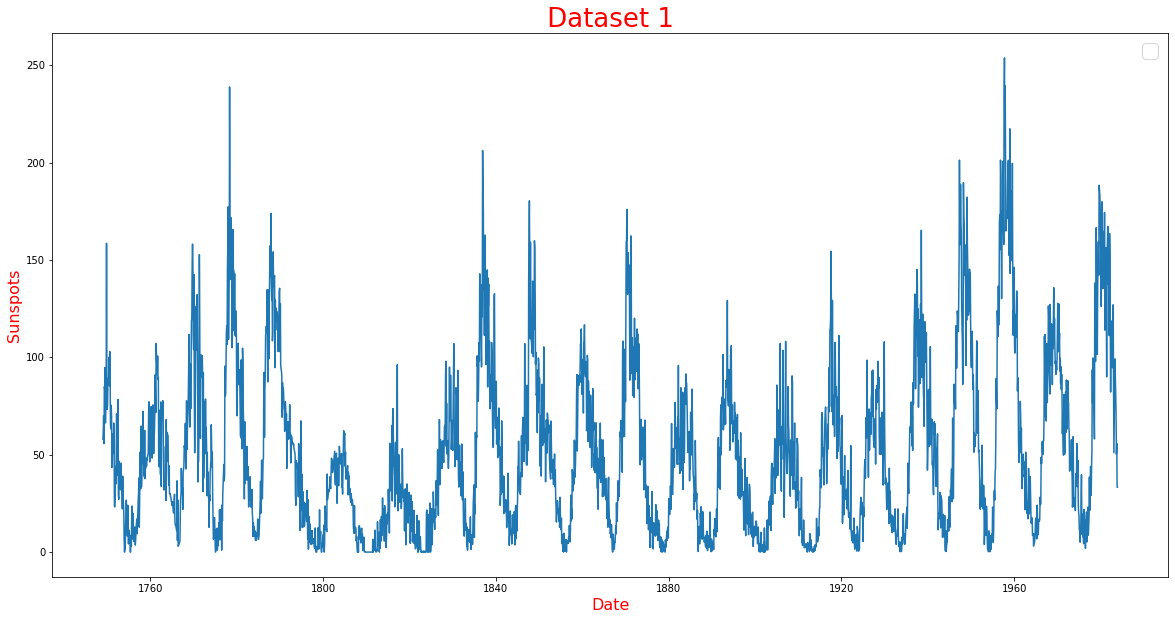

In [35]:
plt.figure(figsize=(20,10))
plt.plot(dataset['Date'],dataset['Sunspots'] )
plt.title(' Dataset 1 ',color='red',fontsize=26)
plt.xlabel('Date',color='red',fontsize=16)     
plt.ylabel('Sunspots',color='red',fontsize=16)  

plt.legend(prop={'size': 20})
plt.show()   